# Chemical potential of a van der Waals real gas


**Code:** #117-000

**File:** `apps/van_der_waals/chemical_potential.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fchemical_potential.ipynb)

-----------

The aim of this notebook is to show the contruction of the chemical potential based in van der Waals' isotherms.

## Interface

The main interface (``main_block_117_000``) is divided in five VBox: ``block_1``, ``block_2``, ``block_3``, ``block_4`` and ``block_5``.
``block_1`` contains two bqplot Figures: ``fig_117_001`` and ``fig_117_002``.
``block_2`` contains the ``T_slider`` widget which controls the isotherms and chemical potentials shown in ``fig_117_001``, ``fig_117_002``, ``fig_117_003`` and ``fig_117_004``.
``block_3`` contains two bqplot Figures: ``fig_117_003`` and ``fig_117_004``.
``block_4`` contains two bqplot Figures: ``fig_117_005`` and ``fig_117_006``.
``block_5`` contains two bqplot Figures: ``fig_117_007`` and ``fig_117_008``.

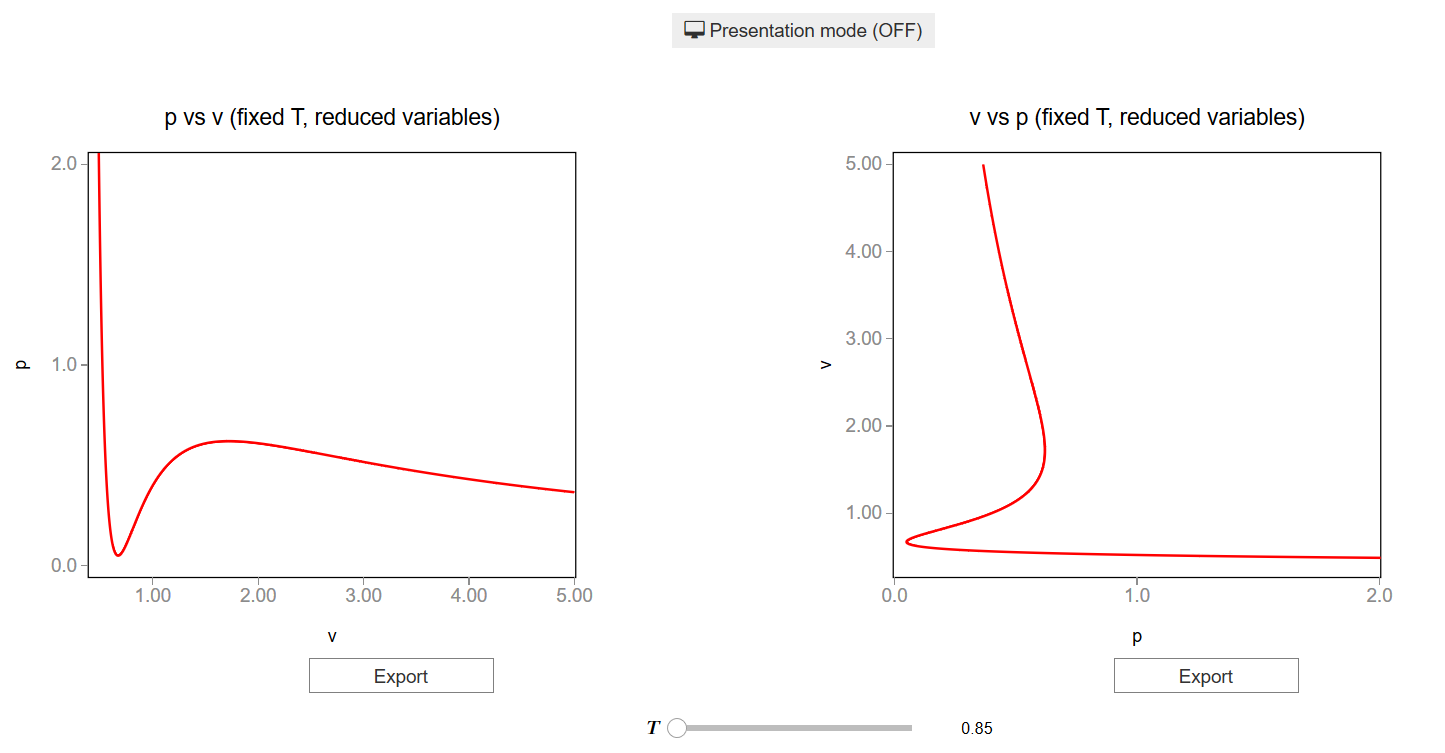

In [1]:
from IPython.display import Image
Image(filename='../../static/images/117-000_1.png')

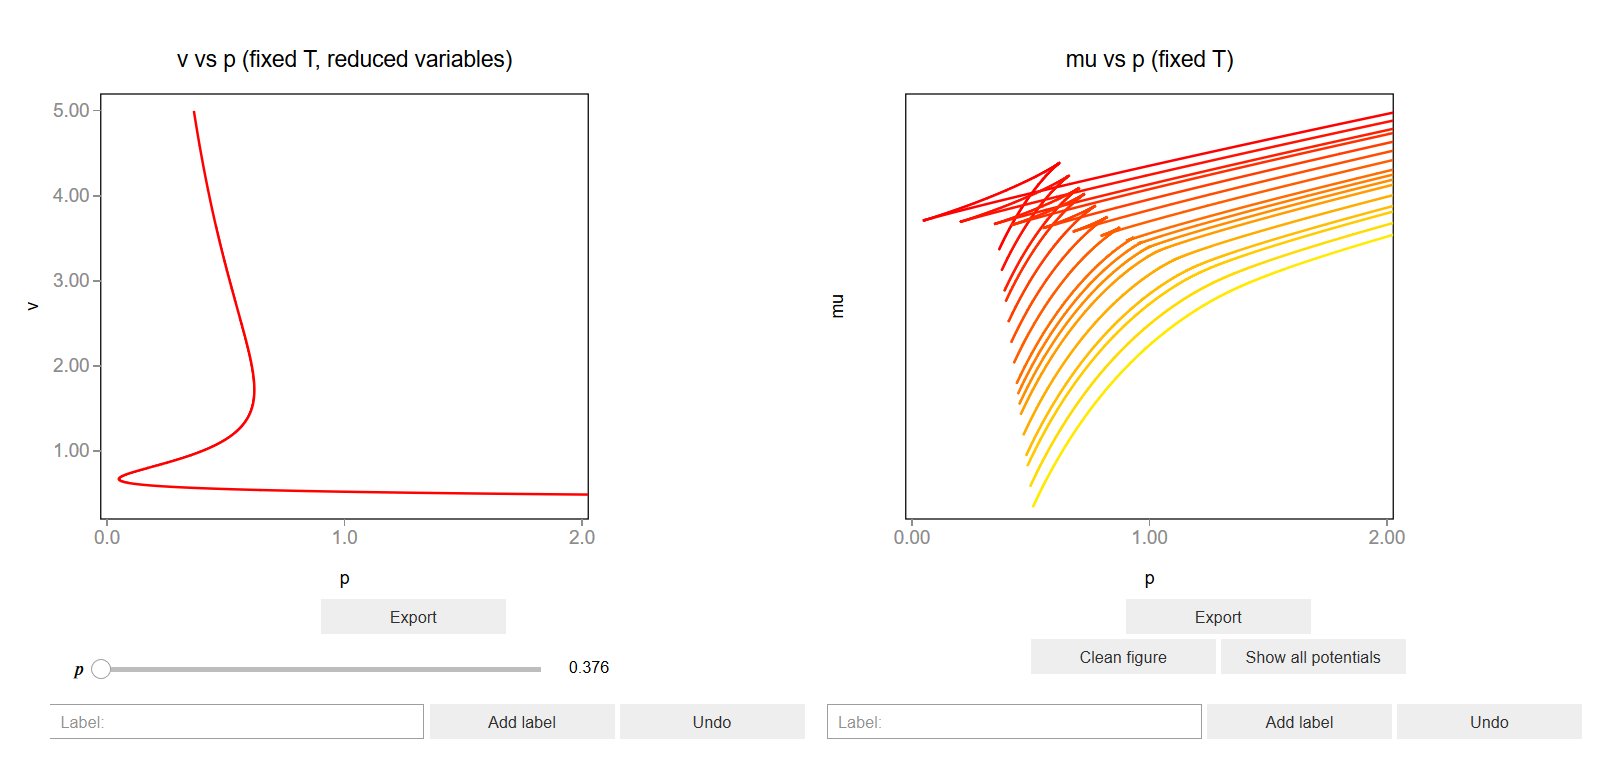

In [2]:
Image(filename='../../static/images/117-000_2.png')

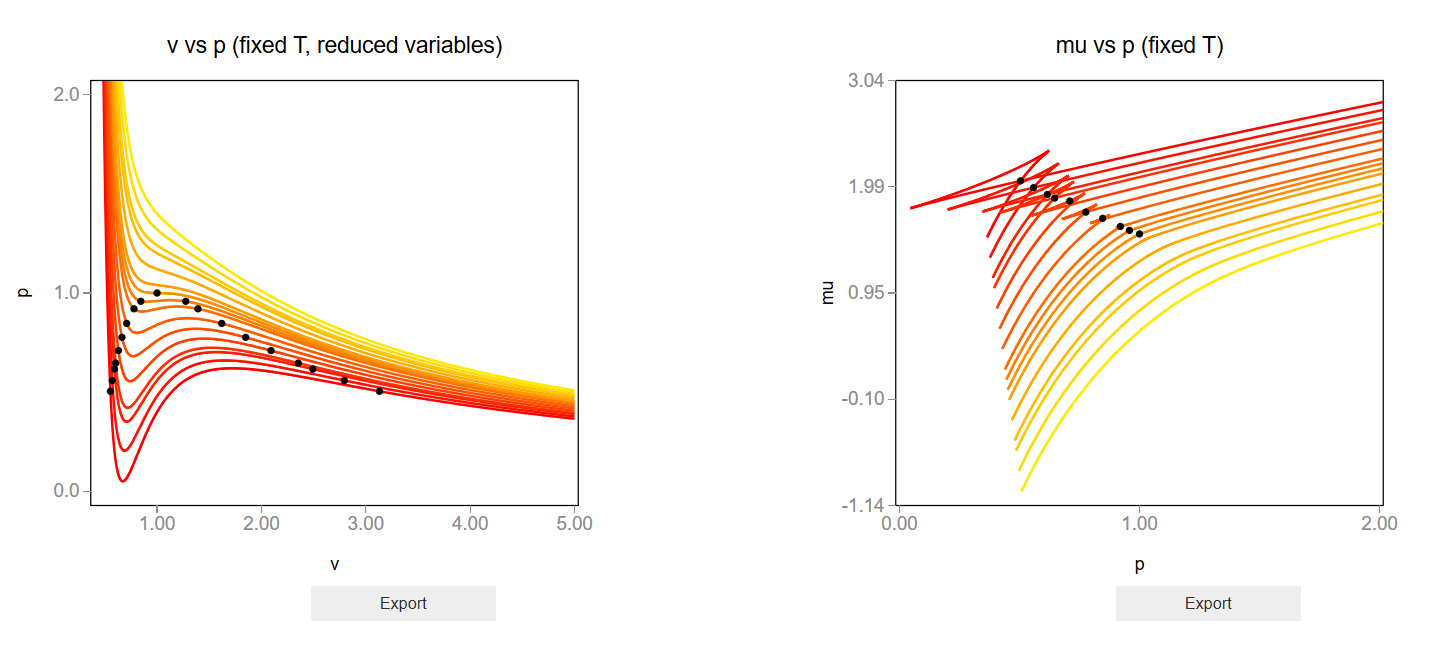

In [3]:
Image(filename='../../static/images/117-000_3.png')

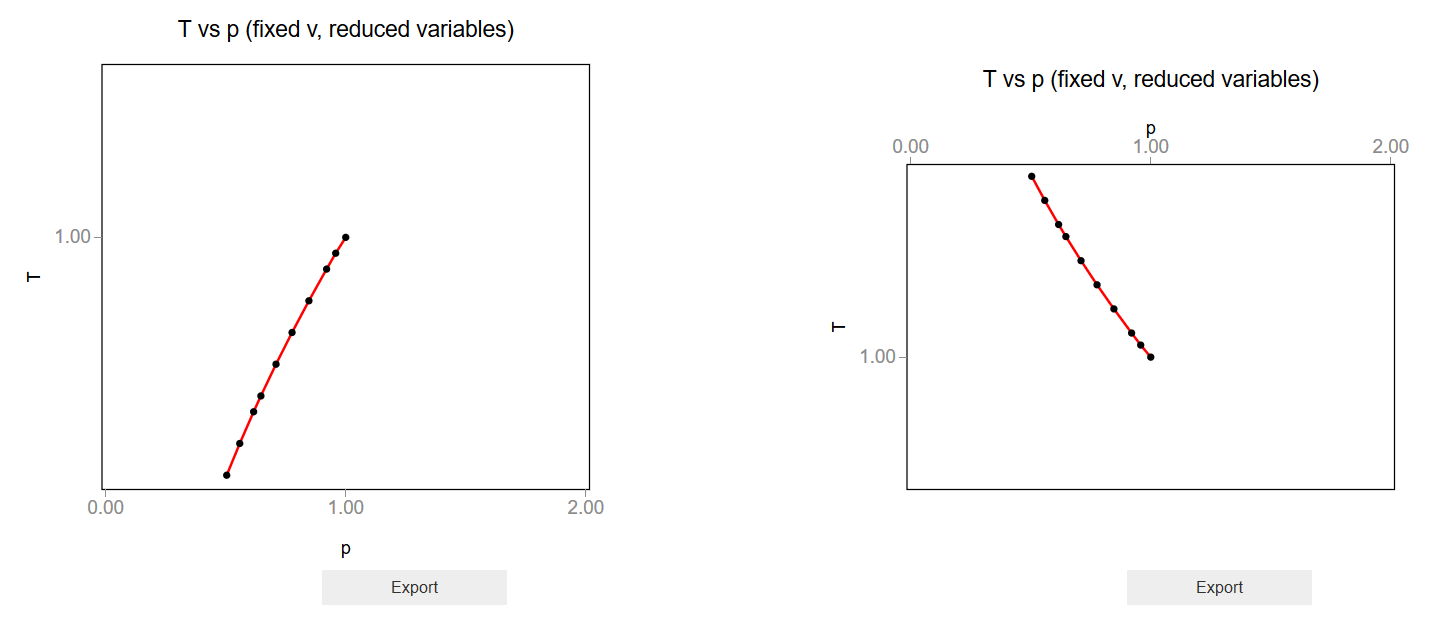

In [4]:
Image(filename='../../static/images/117-000_4.png')

## CSS

A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [5]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.widget-label { display: contents !important; }</style>"))
display(HTML("<style>.slider-container { margin: 12px !important; }</style>"))
display(HTML("<style>.jupyter-widgets { overflow: auto !important; }</style>"))

## Packages

In [6]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_relative_isotherms`
- `experimetal_isotherms`
- `get_roots`
- `p_indefinite_integral`
- `p_definite_integral`
- `find_real_fixed_p`
- `find_real_fixed_T`
- `get_chemical_potential`

In [7]:
def get_relative_isotherms(v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - 1.0/3.0) - 3.0/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

    return isotherms

In [8]:
def experimental_isotherms(p_range, v_range, T_range, fixed_p, fixed_T):
    """This function calculates the experimental p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state for a given range of volumes
        and tenperatures or for a given range of volumes
        and pressures.

    Args:
        p_range: An array containing the values of p
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_p == True.\n
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_T == True.\n
        fixed_p: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n
        fixed_T: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n

        
    Returns:
        expe_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        theo_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        v_limits: A list consisted of arrays of the volume limits of
        the phase-transition of each subcritical isotherm.\n
        p_limits: A list consisted of arrays of the pressure limits of
        the phase-transition of each subcritical isotherm.\n
        tenperatures: A list consisted of the tenperatures of the
        isotherms.\n
    """
    
    if fixed_T:
    
        theo_data = get_relative_isotherms(v_range, T_range)
        expe_data = []

        v_limits = []
        p_limits = []

        p_range = np.linspace(0.001, 1.0, num=10000)
        pressures, v_isobaric_limits = find_real_fixed_T(p_range, T_range)

        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(pressures[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(v_limits, [v_lim[0], v_lim[1]])
                        p_limits = np.append(p_limits, [pressures[i], pressures[i]])

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        tenperatures = T_range
        
        return expe_data, theo_data, p_limits, v_limits, tenperatures
    
    elif fixed_p:
        
        tenperatures, v_isobaric_limits = find_real_fixed_p(p_range, T_range)

        theo_data = get_relative_isotherms(v_range, tenperatures)
        expe_data = []

        v_limits = []
        p_limits = []
        
        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(p_range[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(v_limits, [v_lim[0], v_lim[1]])
                        p_limits = np.append(p_limits, [p_range[i], p_range[i]])

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        return expe_data, theo_data, p_limits, v_limits, tenperatures

In [9]:
def get_roots(p, T):
    """This function finds the intersection between an isobaric curve
       and Van der Waals equation of state for a given T.\n
       Values of v with no physical meaning are dismissed
       (v < 0 or complex).

    Args:
        p: Pressure of the isobaric curve.\n
        T: Tenperature of the isotherm.\n

        
    Returns:
        roots_in_range: A sorted list of the volumes in which the
        isobaric curve intersects the isotherm.\n
    """
    
    roots = np.roots([1.0, - 1.0/3.0*(1.0 + 8.0*T/p), 3.0/p, -1.0/p])
    roots_in_range = []
    
    for root in roots:
        
        # A third degree polynomial has 3 complex roots,
        # but we are only interested in the ones which are
        # purely real.
        
        if np.isreal(root):
            
            root = np.real(root)
            
            if root > 0:
                
                roots_in_range.append(root)

    roots_in_range.sort()
    
    return roots_in_range

In [10]:
def p_indefinite_integral(p_0, v_0, T):
    """This function calculates the indefinite integral between
    a van der Waals isotherm and a isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v0: Value of the volume.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the indefinite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 at a
        volume v0.\n
    """
    
    integral = 8.0/3.0 * T *np.log(v_0 - 1.0/3.0) + 3.0/v_0 - p_0*v_0
    
    return integral

In [11]:
def definite_integral(p_0, v_range, T):
    """This function 'p_indefinite_integral' function to calculate
    the definite integral between a van der Waals isotherm and a
    isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v_range: Tuple or list consisted of volume limits.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the definite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 in a
        volume range v_range.\n
    """
    
    v_0, v_1 = v_range[0], v_range[1]
    
    integral = p_indefinite_integral(p_0, v_1, T) - p_indefinite_integral(p_0, v_0, T)
    
    return integral

In [12]:
def find_real_fixed_T(p_values, T_values):
    """This function uses Maxwell's construction to find the
       pressures in which phase transition happens given some
       fixed tenperatures.\n

    Args:
        p_values: List of pressures in which the real isotherm is
        searched.\n
        T_values: List of tenperatures of the isotherms.\n

        
    Returns:
        pressures: List of pressures in which phase transition
        happens.\n
        v_range: Volume limits of phase transition zones.
    """
    
    eps = 1e-3
    
    pressures = []
    v_ranges = []
    
    for T in T_values:
        
        if T < 1.0:
        
            for p in p_values:
                
                roots = get_roots(p, T)
                
                if len(roots) == 3:
                    
                    v_range = [roots[0], roots[2]]
                    area = definite_integral(p, v_range, T)
                    
                    if abs(area) < eps:
                        
                        pressures.append(p)
                        v_ranges.append(v_range)
                        
                        break
                        
        elif T == 1.0:
            
            pressures.append(1.0)
            v_ranges.append([1.0])

    return pressures, v_ranges

In [13]:
def get_chemical_potential(p_values, v_values):
    """This function calculates chemical potential by integrating
    v(p) isotherms.\n

    Args:
        p_values: List of numpy arrays containing the pressures of
        the isotherms.\n
        v_values: List of numpy arrays containing the volumes of
        the isotherms.\n

        
    Returns:
        mu: List of numpy arrays containing the chemical potentials of
        the isotherms.
    """
    
    mu = []
    
    
    for i in range(len(v_values)):

        v = v_values[i]
        p = p_values[i]
        
        pot = [10.0] #starting random value
        
        l = np.size(p)
        
        for j in range(1, l):
            pot.append(pot[j-1] + v[j]*(p[j] - p[j-1]))
        
        mu.append(pot)
        
    return mu

## Functions related with the interaction

In [14]:
def find_nearest_index(array, value):
    """This function find index of the element in an array which
    value is the nearest to the given one.
    
    Args:
        array: A list or numpy array containing the elements.\n
        value: Float number.\n

    Returns:
        idx: Index of the element in array which value is the nearest
        to value.
    """
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [15]:
def update_tracer(change):
    """This function updates the tracer marks tracer_117_003
    (fig_117_003) and tracer_117_004 (fig_117_004).\n
    """
    
    tracer_117_003.visible = True
    tracer_117_004.visible = True
    
    if p_slider.value == p_slider.options[-1]:
        p_slider.disabled = True
    
    v = theo_v_values_inverted[T_slider.index][p_slider.index]
    p = theo_p_values_inverted[T_slider.index][p_slider.index]
    
    tracer_117_003.x, tracer_117_003.y = [p], [v]

    area_117_003.x = np.append(area_117_003.x, p)
    area_117_003.y = np.append(area_117_003.y, v)
        
    lines_117_004.x = np.append(lines_117_004.x, p)
    lines_117_004.y = np.append(lines_117_004.y, mu[T_slider.index][p_slider.index])
    
    tracer_117_004.x, tracer_117_004.y = [p], [mu[T_slider.index][p_slider.index]]

In [16]:
def restart_chemical_potential(a):
    """This function clear fig_117_004 and restarts
    the tracers tracer_117_003 and tracer_117_004 and
    deletes the labels labels_117_003 and labels_117_004.\n
    """
    
    lines_117_004.x, lines_117_004.y = [], []
    area_117_003.x, area_117_003.y = [], []
    
    p_slider.index = 0
    p_slider.disabled = False
    
    axis_y_004.scale =  bqs.LinearScale(
        min = min(mu[T_slider.index]),
        max = max(mu[T_slider.index])
    )
    
    lines_117_004.scales = {'x': scale_x_004, 'y': axis_y_004.scale}
    
    fig_117_004.axis = [
        axis_x_004,
        axis_y_004
    ]
    
    labels_117_003.x, labels_117_003.y = [], []
    labels_117_003.names = []
    
    labels_117_004.x, labels_117_004.y = [], []
    labels_117_004.names = []

In [17]:
def change_tenperature(change):
    """This function changes the visible isotherm
    in fig_117_001, fig_117_002 and fig_117_003.\n
    """
    
    p_slider.options = theo_v_values_inverted[T_slider.index]
    
    #restart chemical potential plot and tracer
    restart_chemical_potential(None)
    update_tracer(None)
    
    obj = change.owner
    
    i = obj.index
    
    opacities = [0.0 for t in obj.options]
    opacities[i] = 1.0
    
    lines_117_001.opacities = opacities
    lines_117_002.opacities = opacities    
    
    v = theo_v_values_inverted[T_slider.index][i]
    p = theo_p_values_inverted[T_slider.index][i]
    
    tracer_117_003.x, tracer_117_003.y = [p], [v]
    
    axis_y_004.scale =  bqs.LinearScale(
        min = min(mu[T_slider.index]),
        max = max(mu[T_slider.index])
    )
    
    lines_117_004.scales = {'x': scale_x_004, 'y': axis_y_004.scale}
    tracer_117_004.scales = {'x': scale_x_004, 'y': axis_y_004.scale}
    labels_117_004.scales = {'x': scale_x_004, 'y': axis_y_004.scale}
    
    fig_117_004.axis = [
        axis_x_004,
        axis_y_004
    ]

In [18]:
def show_all_potentials(change):
    """This function show all mu(p,T) lines in
    fig_117_004.\n
    """
    
    max_limit = 0.0
    min_limit = 100.0
    
    for pot in mu:
        max_pot = max(pot)
        min_pot = min(pot)
        
        if max_pot > max_limit:
            max_limit = max_pot
            
        if min_pot < min_limit:
            min_limit = min_pot
            
    axis_y_004.scale =  bqs.LinearScale(min = min_limit, max = max_limit)

    lines_117_004.scales = {'x': scale_x_004, 'y': axis_y_004.scale}
    axis_y_004.tick_values = np.linspace(0.0, max_limit, 4)

    p_values = [p.tolist() for p in theo_p_values_inverted]
    mu_values = [m.tolist() for m in mu]

    lines_117_004.x, lines_117_004.y = p_values, mu_values
    
    tracer_117_004.visible = False

In [19]:
def update_text(change):
    """This function show all mu(p,T) lines in
    fig_117_004.\n
    """
    
    obj = change.owner
    i = obj.index
    
    p_text.value = '<p> {:.3f} </p>'.format(theo_p_values_inverted[T_slider.index][i])

In [20]:
def add_label(mark, x, y, label):
    """This function adds a point and a name to the bqplot mark.\n
    
    Args:
        mark: A bqplot marks.\n
        x: x value of the new point.\n
        y: y value of the new point.\n
        label: String containing the new label.\n

    """
        
    x_labels = [elem for elem in mark.x]
    y_labels = [elem for elem in mark.y]
    
    x_labels.append(x)
    y_labels.append(y)
    
    mark.x, mark.y = x_labels, y_labels
    mark.names = np.append(mark.names, label)

In [21]:
def get_new_label(labels):
    """This function returns an alphabetical label different
    from the ones given in the 'labels' list.
    
    Args:
        labels: A list consisted of the current labels.\n

    Returns:
        elem: A string with a new label which is not in 'labels'.\n
    """
    
    
    alpha = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    alpha2 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    count = 0
    i = 0
    while i < len(alpha):
        
        elem = alpha[i]
        
        if not np.isin(elem,labels):
            break
        
        if i == (len(alpha) - 1):
            alpha = [alpha2[count] + elem for elem in alpha2]
            i = 0
            count = count + 1
            
        i = i + 1
    
    return elem

In [22]:
def add_label_button_clicked(a):
    """This function is called when 'add_label_button_117_003' or
    'add_label_button_117_004' are clicked and calls 'add_label'
    function.\n
    """
    
    if a is add_label_button_117_003:
        
        label = label_input_117_003.value

        if label == '':
            
            label = get_new_label(labels_117_003.names)
        
        add_label(
            labels_117_003,
            tracer_117_003.x[0],
            tracer_117_003.y[0],
            label
        )
        
        label_input_117_003.value = ''
        
    
    elif a is add_label_button_117_004:
        
        label = label_input_117_004.value

        if label == '':
            
            label = get_new_label(labels_117_004.names)
        
        add_label(
            labels_117_004,
            lines_117_004.x[-1],
            lines_117_004.y[-1],
            label
        )
    
        label_input_117_004.value = ''

In [23]:
def undo_label_button_clicked(a):
    """This function is called when 'undo_label_button_117_003' or
    'undo_label_button_117_004' are clicked  and removes the last
    label added from the bqplot marks 'labels_117_003' or
    'labels_117_004' of the bqplot figures 'fig_117_003'
    and 'fig_117_004'.\n
    """
    
    if a is undo_label_button_117_003 and len(labels_117_003.x) > 0:

        labels_117_003.x, labels_117_003.y = labels_117_003.x[:-1], labels_117_003.y[:-1]
        labels_117_003.names = labels_117_003.names[:-1]
    
    elif a is undo_label_button_117_004 and len(labels_117_004.x) > 0:
    
        labels_117_004.x, labels_117_004.y = labels_117_004.x[:-1], labels_117_004.y[:-1]
        labels_117_004.names = labels_117_004.names[:-1]

In [24]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '15px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '15px'}
                axis.label_style = {'font-size': '15px'}

In [25]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """
    
    if button is prepare_export_fig_117_001_button:
        
        export_plot(fig_117_001)
        
    elif button is prepare_export_fig_117_002_button:
        
        export_plot(fig_117_002)
        
    elif button is prepare_export_fig_117_003_button:
        
        export_plot(fig_117_003)
        
    elif button is prepare_export_fig_117_004_button:
        
        export_plot(fig_117_004)
        
    elif button is prepare_export_fig_117_005_button:
        
        export_plot(fig_117_005)
        
    elif button is prepare_export_fig_117_006_button:
        
        export_plot(fig_117_006)
        
    elif button is prepare_export_fig_117_007_button:
        
        export_plot(fig_117_007)
        
    elif button is prepare_export_fig_117_008_button:
        
        export_plot(fig_117_008)

In [26]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"

In [27]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Functions related to visualization

In [28]:
def hex_to_rgb(number_hex):
    """This function converts a hexadecimal color to its rgb
    equivalent.
    
    Args:
        number_hex: String containing the hexadecimal representation
        of the color.\n
        
    Returns:
        number_rgb: Tuple consisted of the 3 numbers of the rgb
        representation of the color.\n
    """
    
    if '#' in number_hex:
        number_hex = number_hex[1:]
    
    number_rgb = (int(number_hex[0:2], 16), \
                  int(number_hex[2:4], 16), \
                  int(number_hex[4:], 16))
    
    return number_rgb

In [29]:
def rgb_to_hex(number_rgb):
    """This function converts a rgb color to its hexadecimal
    equivalent.
    
    Args:
        number_rgb: Tuple consisted of the 3 numbers of the rgb
        representation of the color.\n
        
    Returns:
        number_hex: String containing the hexadecimal representation
        of the color.\n
    """
    
    number_rgb = '#' \
    + format(number_rgb[0], '02x') \
    + format(number_rgb[1], '02x') \
    + format(number_rgb[2], '02x')
    
    return number_rgb

In [30]:
def generate_gradient(initial, final, length):
    """This function generates a color gradient consisted of N
    colors from the initial to the final.
    
    Args:
        initial: String of the hexadecimal representation of the
        initial color.\n
        final: String of the hexadecimal representation of the
        final color.\n
        length: Number of colors.\n
        
    Returns:
        colors: List consisted of strings of the hexadecimal
        colors.\n
    """
    
    i_r, i_g, i_b = hex_to_rgb(initial)
    f_r, f_g, f_b = hex_to_rgb(final)
    
    r_step = (f_r - i_r)/length
    g_step = (f_g - i_g)/length
    b_step = (f_b - i_b)/length
    
    r, g, b = i_r, i_g, i_b
    colors = []
    
    for i in range(length):

        h = rgb_to_hex((int(round(r)),int(round(g)),int(round(b))))
        
        colors.append(h)
        
        r = r + r_step
        g = g + g_step
        b = b + b_step

    return colors

## Main interface

In [31]:
#v_values_1 = np.geomspace(0.48, 0.8, 1000)
#v_values_2 = np.geomspace(0.8, 5.2, 500)
#
#v_values = np.concatenate((v_values_1, v_values_2))
v_values = np.geomspace(0.48, 5.0, 1000)
T_values = np.round(np.linspace(0.85, 1.1, 15), 2)

if 1.0 not in T_values:
    T_values = np.sort(np.append(T_values, 1.0))

data = experimental_isotherms(
        p_range=[],
        v_range=v_values,
        T_range=T_values,
        fixed_T = True,
        fixed_p = False
)

expe_p_values = data[0]
theo_p_values = data[1]

p_limits = data[2]
v_limits = data[3]
T_limits = data[4]

colors = generate_gradient('#FF0000', '#FFfa00', len(T_limits)) 
opacities = [0.0 for t in T_values]
opacities[0] = 1.0

# change view button

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='auto'
    )
)

change_view_button.observe(change_view, 'value')

In [32]:
################################
######1ST BLOCK#################
################################

# This block shows the p(v,T) (fig_117_001) and
# v(p,T) (fig_117_002) figures.


block_1 = widgets.VBox(
    [],
    layout=widgets.Layout(
        align_items='center',
        align_self= 'center'
    )
)

scale_x = bqs.LinearScale(min = 0.4, max = 5.0)
scale_y = bqs.LinearScale(min = 0.0, max = 2.0)

axis_x_001 = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [1.0, 2.0, 3.0, 4.0, 5.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_001 = bqa.Axis(
    scale=scale_y,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = [0, 1.0, 2.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_117_001 = Figure(
    title='p vs v (fixed T, reduced variables)',
    marks=[],
    axes=[axis_x_001, axis_y_001],
    animation_duration=250, 
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=70, right=20),
    toolbar = True
)

lines_117_001 = bqm.Lines(
    x = v_values, 
    y = np.array(theo_p_values), 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = opacities,
    visible = True,
    colors = colors,
)

fig_117_001.marks = [lines_117_001]

axis_x_002 = bqa.Axis(
    scale=scale_y,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = [0, 1.0, 2.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='p',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_002 = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [1.0, 2.0, 3.0, 4.0, 5.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='v',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_117_002 = Figure(
    title='v vs p (fixed T, reduced variables)',
    marks=[],
    axes=[axis_x_002, axis_y_002],
    animation_duration=250,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=70, right=20),
    toolbar = True,
)

lines_117_002 = bqm.Lines(
    x = np.array(theo_p_values),
    y = np.array([v_values for p in theo_p_values]),   
    scales = {'x': scale_y, 'y': scale_x}, 
    opacities = opacities,
    visible = True,
    colors = colors
)

fig_117_002.marks = [lines_117_002]

# Export buttons

prepare_export_fig_117_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_117_001_button.on_click(prepare_export)

prepare_export_fig_117_002_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_117_002_button.on_click(prepare_export)


block_1.children = [
    widgets.HBox([
        widgets.VBox([
            fig_117_001,
            prepare_export_fig_117_001_button
        ],
        layout=widgets.Layout(
            align_items='center'
        )),
        widgets.VBox([
            fig_117_002,
            prepare_export_fig_117_002_button
        ],
        layout=widgets.Layout(
            align_items='center'
        )),
    ], 
        layout=widgets.Layout(
            width='100%',
            align_items='center'
        )
    )
]

In [33]:
################################
######2ND BLOCK#################
################################

# This block shows the slider to control the tenperature 
# (T_slider).

block_2 = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

T_slider = widgets.SelectionSlider(
    options= T_values,
    value=T_values[0],
    description=r'\( T \)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout = widgets.Layout(
        width = '300px',
        height = 'auto',
        margin='0 0 0 50px'
    )
)

T_slider.observe(change_tenperature, 'value')

block_2.children = [T_slider]

In [34]:
################################
######3RD BLOCK#################
################################

# This block shows the v(p,T) (fig_117_003) and
# mu(p,T) (fig_117_004) figures.

fig_117_003 = Figure(
    title='v vs p (fixed T, reduced variables)',
    marks=[],
    axes=[axis_x_002, axis_y_002],
    animation_duration=0, #500,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=70, right=20),
    toolbar = True,
)

area_117_003 = bqm.Lines(
    x = [], 
    y = [], 
    scales = {'x': scale_y, 'y': scale_x}, 
    opacities = [1.0],
    visible = True,
    colors = ['#39362d'],
    fill = 'bottom',
    fill_colors = ['#ffd429'],
    fill_opacities = [0.4]
)

tracer_117_003 = bqm.Scatter(
    name = '',
    x = [0.0],
    y = [0.0],
    scales = {'x': scale_y, 'y': scale_x}, 
    opacity = [1.0, 0.0],
    visible = False,
    colors = ['#2807a3'],
)

tt_003 = bq.Tooltip(
    fields = ['x', 'y'],
    formats = ['.3f', '.3f'],
    labels = ['v', 'p']
)

labels_117_003 = bqm.Scatter(
    name = 'labels',
    x = [],
    y = [],
    scales = {'x': scale_y, 'y': scale_x}, 
    #opacities = [1.0],
    visible = True,
    colors = ['black'],
    names = [],
    labels=['labels'],
    tooltip = tt_003,
) 

fig_117_003.marks = [
    lines_117_002,
    area_117_003,
    tracer_117_003,
    labels_117_003
]

theo_p_values_inverted = []
theo_v_values_inverted = []

for p_values in theo_p_values:
    
    indexes = np.where(p_values < 2.2)
    
    theo_p_values_inverted.append(
        np.flip(np.take(p_values, indexes[0]))
    )
    
    theo_v_values_inverted.append(
        np.flip(np.take(v_values, indexes[0]))
    )

mu = get_chemical_potential(
    theo_p_values_inverted,
    theo_v_values_inverted
)

for i in range(len(mu)):
    mu[i] = np.array(mu[i]) - 10.0*T_slider.options[i]

p_text = widgets.HTML(
    value='<p> {:.3f} </p>'.format(theo_p_values_inverted[T_slider.index][i]),
    layout = widgets.Layout(height='auto', margin='10px 0 0 10px')
)

p_slider = widgets.SelectionSlider(
    options= theo_v_values_inverted[0],
    value=theo_v_values_inverted[0][0],
    description=r'\( p \)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    layout = widgets.Layout(
        width = '60%',
        height = 'auto',
        margin='0 0 0 50px'
    )
)

p_slider.observe(update_tracer, 'value')
p_slider.observe(update_text, 'value')


# Figure fig_117_004

scale_x_004 = bqs.LinearScale(min = 0.0, max = 2.0)
scale_y_004 = bqs.LinearScale(
    min = min(mu[T_slider.index]),
    max = max(mu[T_slider.index])
)

axis_x_004 = bqa.Axis(
    scale=scale_x_004,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [0.0, 1.0, 2.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='p',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_004 = bqa.Axis(
    scale=scale_y_004,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    num_ticks = 0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='mu',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_117_004 = Figure(
    title='mu vs p (fixed T)',
    marks=[],
    axes=[axis_x_004, axis_y_004],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=70, right=20),
    toolbar = True,
)

lines_117_004 = bqm.Lines(
    x = [], 
    y = [], 
    scales = {'x': scale_x_004, 'y': scale_y_004}, 
    opacities = [1.0],
    visible = True,
    colors = colors,
)

tracer_117_004 = bqm.Scatter(
    name = '',
    x = [0.0],
    y = [0.0],
    scales = {'x': scale_x_004, 'y': scale_y_004}, 
    opacity = [1.0, 0.0],
    visible = True,
    colors = ['#2807a3'],
)

labels_117_004 = bqm.Scatter(
    name = 'labels',
    x = [],
    y = [],
    scales = {'x': scale_x_004, 'y': scale_y_004}, 
    #opacities = [1.0],
    visible = True,
    colors = ['black'],
    names = [],
    labels=['labels'],
)

fig_117_004.marks = [
    lines_117_004,
    tracer_117_004,
    labels_117_004,
]

restart_button = widgets.Button(
    description='Clean figure',
    disabled=False,
    button_style='', 
    tooltip="",
    layout = widgets.Layout(height='auto')
)

restart_button.on_click(restart_chemical_potential)


show_all_button = widgets.Button(
    description='Show all potentials',
    disabled=False,
    button_style='',
    tooltip="",
    layout = widgets.Layout(height='auto')
)

show_all_button.on_click(show_all_potentials)


# Label buttons

label_input_117_003 = widgets.Text(
    value='',
    placeholder="Label:",
    disabled = False,
)

add_label_button_117_003 = widgets.Button(
    description='Add label',
    disabled=False,
    button_style='',
    tooltip="Add label in tracer's position",
)

add_label_button_117_003.on_click(add_label_button_clicked)

undo_label_button_117_003 = widgets.Button(
    description='Undo',
    disabled=False,
    button_style='', 
    tooltip="Remove last added label",
)

undo_label_button_117_003.on_click(undo_label_button_clicked)

label_input_117_004 = widgets.Text(
    value='',
    placeholder="Label:",
    disabled = False,
)

add_label_button_117_004 = widgets.Button(
    description='Add label',
    disabled=False,
    button_style='',
    tooltip="Add label in tracer's position",
)

add_label_button_117_004.on_click(add_label_button_clicked)

undo_label_button_117_004 = widgets.Button(
    description='Undo',
    disabled=False,
    button_style='', 
    tooltip="Remove last added label",
)

undo_label_button_117_004.on_click(undo_label_button_clicked)

# Export buttons

prepare_export_fig_117_003_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(align_self='center')
)

prepare_export_fig_117_003_button.on_click(prepare_export)

prepare_export_fig_117_004_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_117_004_button.on_click(prepare_export)


block_3 = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

block_3.children = [
    widgets.HBox([
        widgets.VBox([
            fig_117_003,
            prepare_export_fig_117_003_button,
            widgets.HBox([p_slider, p_text])],
            layout=widgets.Layout(
                height='auto',
            )),
        widgets.VBox([
            fig_117_004,
            prepare_export_fig_117_004_button,
            widgets.HBox([restart_button, show_all_button]),
        ],
            layout=widgets.Layout(align_items='center')
        )    
    ]),
    widgets.HBox([
        label_input_117_003,
        add_label_button_117_003,
        undo_label_button_117_003,
        widgets.HTML('<div style="width:10px"></div>'),
        label_input_117_004,
        add_label_button_117_004,
        undo_label_button_117_004
    ]),
]

In [35]:
################################
######4TH BLOCK#################
################################

block_4 = widgets.HBox(
    [],
    layout=widgets.Layout(
        align_items='center'
    )
)

tt_005 = bq.Tooltip(
    fields = ['y', 'x'],
    formats = ['.3f', '.3f'],
    labels = ['p', 'v']
)

lines_117_005 = bqm.Lines(
    x = v_values,
    y = theo_p_values, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0],
    visible = True,
    colors = colors,
)

scatter_117_005 = bqm.Scatter(
    name = '',
    x = v_limits,
    y = p_limits,
    scales = {'x': scale_x, 'y': scale_y}, 
    visible = True,
    colors = ['black'],
    default_size = 15,
    tooltip = tt_005
)   

fig_117_005 = Figure(
    title='v vs p (fixed T, reduced variables)',
    marks=[lines_117_005, scatter_117_005],
    axes=[axis_x_001, axis_y_001],
    animation_duration=0, #500,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=70, right=20),
    toolbar = True,
)

# fig_117_006

# Calculate the limits of the plot
max_limit = 0.0
min_limit = 100.0

for pot in mu:
    max_pot = max(pot)
    min_pot = min(pot)

    if max_pot > max_limit:
        max_limit = max_pot

    if min_pot < min_limit:
        min_limit = min_pot

# Calculate the phase transition points in the mu(p, T) plane
trans_mu = []

trans_p = np.unique(p_limits)

for i in range(len(trans_p)):
    
    p = trans_p[i]
    m = mu[i]
    
    j = find_nearest_index(theo_p_values_inverted[i], p)
    
    trans_mu.append(mu[i][j])

scale_x_006 = bqs.LinearScale(min = 0.0, max = 2.0)
scale_y_006 = bqs.LinearScale(min = min_limit, max = max_limit)

axis_x_006 = bqa.Axis(
    scale=scale_x_006,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [0.0, 1.0, 2.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='p',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_006 = bqa.Axis(
    scale=scale_y_006,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    num_ticks = 5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='mu',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)


lines_117_006 = bqm.Lines(
    x = [p.tolist() for p in theo_p_values_inverted],
    y = [m.tolist() for m in mu], 
    scales = {'x': scale_x_006, 'y': scale_y_006}, 
    opacities = [1.0],
    visible = True,
    colors = colors,
)

scatter_117_006 = bqm.Scatter(
    name = '',
    x = trans_p,
    y = trans_mu,
    scales = {'x': scale_x_006, 'y': scale_y_006}, 
    visible = True,
    colors = ['black'],
    default_size = 15,
) 

fig_117_006 = Figure(
    title='mu vs p (fixed T)',
    marks=[lines_117_006, scatter_117_006],
    axes=[axis_x_006, axis_y_006],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=70, right=20),
    toolbar = True,
)

# Export buttons

prepare_export_fig_117_005_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(align_self='center')
)

prepare_export_fig_117_005_button.on_click(prepare_export)

prepare_export_fig_117_006_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_117_006_button.on_click(prepare_export)


block_4.children = [
    widgets.HBox([
        widgets.VBox([
            fig_117_005,
            prepare_export_fig_117_005_button
        ],
        layout=widgets.Layout(
            align_items='center'
        )),
        widgets.VBox([
            fig_117_006,
            prepare_export_fig_117_006_button
        ],
        layout=widgets.Layout(
            align_items='center'
        )),
    ], 
        layout=widgets.Layout(
            width='100%',
            align_items='center'
        )
    )
]

In [36]:
################################
######5TH BLOCK#################
################################

# This block contains the p(T) and T(p) figures

block_5 = widgets.HBox(
    [],
    layout=widgets.Layout(align_items='center')
)

scale_y_007 = bqs.LinearScale(
    min = min(T_values),
    max = max(T_values)
)
          
axis_y_007 = bqa.Axis(
    scale=scale_y_007,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [0.0, 1.0, 2.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='T',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px',
)

tt_007 = bq.Tooltip(
    fields = ['y', 'x'],
    formats = ['.3f', '.3f'],
    labels = ['T', 'p']
)

lines_117_007 = bqm.Lines(
    x = trans_p,
    y = T_values, 
    scales = {'x': scale_x_006, 'y': scale_y_007}, 
    opacities = [1.0],
    visible = True,
    colors = ['red'],
)

scatter_117_007 = bqm.Scatter(
    name = '',
    x = trans_p,
    y = T_values,
    scales = {'x': scale_x_006, 'y': scale_y_007}, 
    visible = True,
    colors = ['black'],
    default_size = 15,
    tooltip = tt_007
)   

fig_117_007 = Figure(
    title='T vs p (fixed v, reduced variables)',
    marks=[lines_117_007, scatter_117_007],
    axes=[axis_x_006, axis_y_007],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=70, right=20),
    toolbar = True,
)

# fig_117_008

scale_y_008 = bqs.LinearScale(
    min = min(T_values),
    max = max(T_values),
    reverse = True
)
      
axis_x_008 = bqa.Axis(
    scale=scale_x_006,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [0.0, 1.0, 2.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='p',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='30px',
    side='top'
)    

axis_y_008 = bqa.Axis(
    scale=scale_y_008,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [0.0, 1.0, 2.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='T',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px',
)

tt_008 = bq.Tooltip(
    fields = ['y', 'x'],
    formats = ['.3f', '.3f'],
    labels = ['T', 'p']
)

lines_117_008 = bqm.Lines(
    x = trans_p,
    y = T_values, 
    scales = {'x': scale_x_006, 'y': scale_y_008}, 
    opacities = [1.0],
    visible = True,
    colors = ['red'],
)

scatter_117_008 = bqm.Scatter(
    name = '',
    x = trans_p,
    y = T_values,
    scales = {'x': scale_x_006, 'y': scale_y_008}, 
    visible = True,
    colors = ['black'],
    default_size = 15,
    tooltip = tt_008
)   

fig_117_008 = Figure(
    title='T vs p (fixed v, reduced variables)',
    marks=[lines_117_008, scatter_117_008],
    axes=[axis_x_008, axis_y_008],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    max_aspect_ratio=1.0,
    fig_margin=dict(top=160, bottom=60, left=70, right=20),
    toolbar = True,
)

# Export buttons

prepare_export_fig_117_007_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(align_self='center')
)

prepare_export_fig_117_007_button.on_click(prepare_export)

prepare_export_fig_117_008_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_117_008_button.on_click(prepare_export)

block_5.children = [
    widgets.HBox([
        widgets.VBox([
            fig_117_007,
            prepare_export_fig_117_007_button
        ],
        layout=widgets.Layout(
            align_items='center'
        )),
        widgets.VBox([
            fig_117_008,
            prepare_export_fig_117_008_button
        ],
        layout=widgets.Layout(
            align_items='center'
        )),
    ], 
        layout=widgets.Layout(
            width='100%',
            align_items='center'
        )
    )
]

In [ ]:
###################################
#############MAIN BLOCK############
###################################

main_block_117_000 = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

main_block_117_000.children = [
    change_view_button,
    block_1,
    block_2,
    block_3,
    block_4,
    block_5
]

figures = [
    fig_117_001,
    fig_117_002,
    fig_117_003,
    fig_117_004,
    fig_117_005,
    fig_117_006,
    fig_117_007,
    fig_117_008,
]

main_block_117_000